# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
#Dependencies
import requests
import random
import numpy as np
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy
# Import API key
from api_keys import weather_api_key



## Generate Cities List

In [27]:
with gzip.open('city.list.json.gz', 'rb') as f:
    file_content = f.read()
    
json_str = file_content.decode('utf-8')            # 2. string (i.e. JSON)
data = json.loads(json_str)   
    

#a = file_content.json()
lats = [(45,90), (0,45), (-45,0), (-90,-45)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]

#print(json.dumps(a, indent=4, sort_keys=True))
print(data[1:4])   
    
list(filter(lambda city:(city['coord']['lon'].between(0,45) and (city['coord']['lat'].between()), data))[0]['country']   



[{'id': 2960, 'name': '‘Ayn Ḩalāqīm', 'state': '', 'country': 'SY', 'coord': {'lon': 36.321911, 'lat': 34.940079}}, {'id': 3245, 'name': 'Taglag', 'state': '', 'country': 'IR', 'coord': {'lon': 44.98333, 'lat': 38.450001}}, {'id': 3530, 'name': 'Qabāghlū', 'state': '', 'country': 'IR', 'coord': {'lon': 46.168499, 'lat': 36.173302}}]


'IR'

KstestResult(statistic=0.044, pvalue=0.7189191850204419)


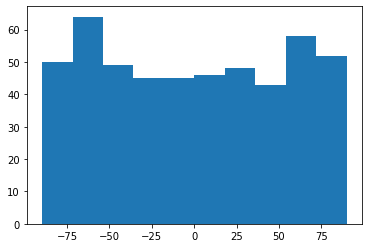

In [7]:
lat = np.random.uniform(-90,90,500)
lat2 = np.random.uniform(-90,90,500)
# bins = [-90, -70, -45, -20, 0, 20,  45, 70, 90]
# range_names = ["<10", "10-14", "15-19", "20-24", "25-29","30-34","35-39","40+" ]
# new = pd.cut(lat, bins, labels = range_names, include_lowest = True)
plt.hist(lat)
#print(stats.kstest(lat, 'uniform', args = (min(lat),max(lat))))
print(stats.kstest(lat, lat2 ,'uniform'))


In [2]:
#geographical coordinates divided into 8 sections to obtain most equal spread of cities
lats = [(45,90), (0,45), (-45,0), (-90,-45)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]
# np.random.uniform(lats[3][0], lats[3][1])
#rg = np.random.default_rng()
#lat = rg.uniform(lats[1][0],lats[1][1],1)
#lon = np.random.uniform(lats[1][0],lats[1][1])
#lon = np.random.uniform(longs[3][0],longs[3][1])
#print (lat, lon)


In [3]:

#function to make lists of cities from above coordinates
def makelists(x,listname):
    while len(listname) < 150:
        lat = np.random.uniform(lats[x][0],lats[x][1])
        lon = np.random.uniform(longs[x][0],longs[x][1])
        city = citipy.nearest_city(lat, lon).city_name
        country = city.country_code
        listname.append(city)
        listname = list(set(listname))
    return(listname)


#city1 = []
#city1 = makelists(3,city1)
#print(city1)

In [6]:
#making lists
cities = {}

for i in range(4):
    name = "city" +str(i)
    listn = []
    listn = makelists(i,listn)
    cities[name] = listn
    
print(cities.keys())


KeyboardInterrupt: 

In [ ]:
#lat south - 90 eq 0 north 90 55 139   21
# #long -180 to 180
cities = []
while len(cities) < 600:
    lat = round(np.random.uniform(-90.0, 90.0),2)
    lon = round(np.random.uniform(-180.0, 180.0),2)
    city = citipy.nearest_city(lat, lon).city_name
    cities.append(city)
    cities = list(set(cities))
print(cities)
len(list(set(cities)))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
for key,value in cities.items():
    for city in value:
        print(city)


In [ ]:

print("Begining of data retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
j = 1
for key,values in cities.items():
    for city in values:

        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"  
        data = requests.get(url).json()
   
        try:

            lat.append(data["coord"]["lat"])
            lon.append(data["coord"]["lon"])
            maxtemp.append(data["main"]["temp_max"])
            humidity.append(data["main"]["humidity"])
            cloudiness.append(data["clouds"]["all"])
            wind.append(data["wind"]["speed"])
            country.append(data["sys"]["country"])
            date.append(data["dt"])
        except: 
            message = data["message"]
            print(f"{message.capitalize()}. Skipping...")     
        else:
            print(f"Processing Record {i} of Set {j} | {city}")
            cities2.append(city)
            cities2 = list(set(cities2))
            i +=1
    j +=1   
    
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#print(len(cities)
#print(citiesdata)

In [ ]:
df1 = pd.DataFrame(citiesdata)
df1.head()

In [ ]:
len(df1)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# if len(df1[df1["Humidity"]>100] == 0):
#     print(0)
# else:
#     over100 = (df1[df1["Humidity"]>100]).index


In [ ]:
#  Get the indices of cities that have humidity over 100%.
if df1["Humidity"].max() > 100:
    over100 = (df1[df1["Humidity"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:

    clean_city_data = df1

In [ ]:
clean_city_data[["Lat","Lng"]]

In [ ]:
plt.hist(clean_city_data["Lat"])

In [ ]:
plt.hist(clean_city_data["Lng"])

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()



## Latitude vs. Humidity Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
northlat = northerncities['Lat']
northtemp = northerncities['Max Temp']
(ntslope, ntintercept, ntrvalue, ntpvalue, ntstderr) = linregress(northlat, northtemp)
northtempregress = northlat * ntslope + ntintercept
ntline = f"y = {ntslope:.2f}x + {ntintercept:.2f}\n$r^{2}$= {ntrvalue:.2f}" 
plt.scatter(northlat,northtemp)
plt.plot(northlat,northtempregress,"r-")
plt.figtext(1,0.2,ntline,fontsize=15,color="red")
plt.title("Max Temperature in Northern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
southlat = southerncities['Lat']
southtemp = southerncities['Max Temp']
(stslope, stintercept, strvalue, stpvalue, ststderr) = linregress(southlat, southtemp)
southtempregress = southlat * stslope + stintercept
stline = f"y = {stslope:.2f}x + {stintercept:.2f}\n$r^{2}$= {strvalue:.2f}" 
plt.scatter(southlat,southtemp)
plt.plot(southlat,southtempregress,"r-")
plt.figtext(1,0.2,stline,fontsize=15,color="red")
plt.title("Max Temperature in Southern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
northlat = northerncities['Lat']
northhum = northerncities['Humidity']
(nhslope, nhintercept, nhrvalue, nhpvalue, nhstderr) = linregress(northlat, northhum)
northhumregress = northlat * nhslope + nhintercept
nhline = f"y = {nhslope:.2f}x + {nhintercept:.2f}\n$r^{2}$= {nhrvalue:.2f}" 
plt.scatter(northlat,northhum)
plt.plot(northlat,northhumregress,"r-")
plt.figtext(1,0.2,nhline,fontsize=15,color="red")
plt.title("Humidity in Northern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
southlat = southerncities['Lat']
southhum = southerncities['Humidity']
(shslope, shintercept, shrvalue, shpvalue, shstderr) = linregress(southlat, southhum)
sorthhumregress = southlat * shslope + shintercept
shline = f"y = {shslope:.2f}x + {shintercept:.2f}\n$r^{2}$= {shrvalue:.2f}" 
plt.scatter(southlat,southhum)
plt.plot(southlat,sorthhumregress,"r-")
plt.figtext(1,0.2,shline,fontsize=15,color="red")
plt.title("Humidity in Southern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
northlat = northerncities['Lat']
northcloud = northerncities['Cloudiness']
(ncslope, ncintercept, ncrvalue, ncpvalue, ncstderr) = linregress(northlat, northcloud)
northcloudregress = northlat * ncslope + ncintercept
ncline = f"y = {ncslope:.2f}x + {ncintercept:.2f}\n$r^{2}$= {ncrvalue:.2f}" 
plt.scatter(northlat,northcloud)
plt.plot(northlat,northcloudregress,"r-")
plt.figtext(1,0.2,ncline,fontsize=15,color="red")
plt.title("Cloudiness in Northern Hemisphere Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
southlat = southerncities['Lat']
southcloud = southerncities['Cloudiness']
(scslope, scintercept, scrvalue, scpvalue, scstderr) = linregress(southlat, southcloud)
sorthcloudregress = southlat * scslope + scintercept
scline = f"y = {scslope:.2f}x + {scintercept:.2f}\n$r^{2}$= {scrvalue:.2f}" 
plt.scatter(southlat,southcloud)
plt.plot(southlat,sorthcloudregress,"r-")
plt.figtext(1,0.2,scline,fontsize=15,color="red")
plt.title("Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
northlat = northerncities['Lat']
northwind = northerncities['Wind Speed']
(nwslope, nwintercept, nwrvalue, nwpvalue, nwstderr) = linregress(northlat, northwind)
northwindregress = northlat * nwslope + nwintercept
nwline = f"y = {nwslope:.2f}x + {nwintercept:.2f}\n$r^{2}$= {nwrvalue:.2f}" 
plt.scatter(northlat,northwind)
plt.plot(northlat,northwindregress,"r-")
plt.figtext(1,0.2,nwline,fontsize=15,color="red")
plt.title("Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
southlat = southerncities['Lat']
southwind = southerncities['Wind Speed']
(swslope, swintercept, swrvalue, swpvalue, swstderr) = linregress(southlat, southwind)
sorthwindregress = southlat * swslope + swintercept
swline = f"y = {swslope:.2f}x + {swintercept:.2f}\n$r^{2}$= {swrvalue:.2f}" 
plt.scatter(southlat,southwind)
plt.plot(southlat,sorthwindregress,"r-")
plt.figtext(1,0.2,swline,fontsize=15,color="red")
plt.title("Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()